## Plot results

In [1]:
#set which GPU you wanna use
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
os.environ["CUDA_VISIBLE_DEVICES"]='0' 

In [2]:
def build_results_df(folders):
    ''' Args-
        folders:  list of folders to look for the results json file in. Ex: ["results_*/", "backup/results_*/"] '''
    df = pd.DataFrame()
    for folder in folders:
        for jsonfile in glob(folder+"/scores_*.json"):
            row = pd.read_json(jsonfile, typ='series')
            # get the name of the model and add to df
            name = jsonfile.split("/")[-2].replace("results_","")
            row['model']=name
            df = df.append(row, ignore_index=True)
    df = df.set_index('model').sort_index()
    return df

In [3]:


def plot_results_df(df):
    # check if all columns exists, if not print warning and add column 
    for c in ["Conditioned_SSIM_mean", "MSE_mean", "MSE_std", "MSE_mean_prev_frame_copy", "MSE_std_prev_frame_copy",
            "MAE_mean", "MAE_std", "MAE_mean_prev_frame_copy", "MAE_std_prev_frame_copy",
            "SSIM_mean","SSIM_mean_prev_frame_copy", "SSIM_movement_mean", "SSIM_movement_mean_prev_frame_copy",
            "PSNR_mean", "PSNR_mean_prev_frame_copy", "PSNR_movement_mean", "PSNR_movement_mean_prev_frame_copy",
            "Sharpness_grad_mean", "Sharpness_difference_mean", "accuracy" 
             #, "Sharpness_grad_mean_prev_frame_copy", "Sharpness_mean_prev_frame_copy"
             ]:
        if(c not in df.columns):
            print("WARNING:'{}' doesnot exist in any of the result*.json files".format(c))
            df[c] = 0
    
    f, axs = plt.subplots(8,2, figsize=(15,25), sharex=True)
    row = 0
    
    # 9) plot conditioned SSIM scores
    row = 0
    df.plot.bar(y=["Conditioned_SSIM_mean"], ax=axs[row,0]
                , title="Conditioned SSIM", grid=True)
    axs[row,0].get_legend().remove()  
    axs[row,1].axis("off")
    
    # 1) plot the MSE raw scores
    row += 1
    df.plot.bar(y=["MSE_mean", "MSE_mean_prev_frame_copy"], ax=axs[row,0]
                , yerr=df[["MSE_std", "MSE_std_prev_frame_copy"]].rename(columns={"MSE_std":"MSE_mean", "MSE_std_prev_frame_copy":"MSE_mean_prev_frame_copy"})
                , title="Mean square error", grid=True)
    axs[row,0].legend(["model MSE", "prev-frame-copy MSE"])
    
    # plot the MSE improvements
    (df["MSE_mean_prev_frame_copy"] - df["MSE_mean"]).plot(
        ax=axs[row,1], title="MSE improvement", grid=True, kind="bar")
    axs[row,1].axhline()
    
    # 2) plot the MAE raw scores
    row += 1
    df.plot.bar(y=["MAE_mean", "MAE_mean_prev_frame_copy"], ax=axs[row,0]
                , yerr=df[["MAE_std", "MAE_std_prev_frame_copy"]].rename(columns={"MAE_std":"MAE_mean", "MAE_std_prev_frame_copy":"MAE_mean_prev_frame_copy"})
                , title="Mean absolute error", grid=True)
    axs[row,0].legend(["model MAE", "prev-frame-copy MAE"])
    
    # plot the MSE improvements
    (df["MAE_mean_prev_frame_copy"] - df["MAE_mean"]).plot(
        ax=axs[row,1], title="MAE improvement", grid=True, kind="bar")
    axs[row,1].axhline()

    # 3) plot the SSIM scores
    row += 1
    df.plot.bar(y=["SSIM_mean", "SSIM_mean_prev_frame_copy"], ax=axs[row,0]
                , title="SSIM", grid=True)
    axs[row,0].get_legend().remove()#axs[2,0].legend(["model SSIM", "prev-frame-copy SSIM"])
    (df["SSIM_mean"] - df["SSIM_mean_prev_frame_copy"]).plot(
        ax=axs[row,1], title="SSIM improvement", grid=True, kind="bar")
    axs[row,1].axhline()
    
    # 4) plot SSIM scores for movement only
    row += 1
    df.plot.bar(y=["SSIM_movement_mean", "SSIM_movement_mean_prev_frame_copy"], ax=axs[row,0]
                , title="SSIM movement", grid=True)
    axs[row,0].get_legend().remove()#axs[3,0].legend(["model SSIM movement", "prev-frame-copy SSIM movement"])
    (df["SSIM_movement_mean"] - df["SSIM_movement_mean_prev_frame_copy"]).plot(
        ax=axs[row,1], title="SSIM movement improvement", grid=True, kind="bar")
    axs[row,1].axhline()   
        
    # 5) plot the PSNR scores
    row += 1
    df.plot.bar(y=["PSNR_mean", "PSNR_mean_prev_frame_copy"], ax=axs[row,0]
                , title="PSNR", grid=True)
    axs[row,0].get_legend().remove()#axs[5,0].legend(["model PSNR", "prev-frame-copy PSNR"])
    (df["PSNR_mean"] - df["PSNR_mean_prev_frame_copy"]).plot(
        ax=axs[row,1], title="PSNR improvement", grid=True, kind="bar")
    axs[row,1].axhline()
    
    # 6) plot PSNR scores for movement only
    row += 1
    df.plot.bar(y=["PSNR_movement_mean", "PSNR_movement_mean_prev_frame_copy"], ax=axs[row,0]
                , title="PSNR movement", grid=True)
    axs[row,0].get_legend().remove()#axs[6,0].legend(["model PSNR movement", "prev-frame-copy PSNR movement"])
    (df["PSNR_movement_mean"] - df["PSNR_movement_mean_prev_frame_copy"]).plot(
        ax=axs[row,1], title="PSNR movement improvement", grid=True, kind="bar")
    axs[row,1].axhline()

    # 7) plot the sharpness - Gradient based
    row += 1
    df.plot.bar(y=["Sharpness_grad_mean"], ax=axs[row,0]
                , title="Gradient-based Sharpness", grid=True)
    axs[row,0].get_legend().remove()#.legend(["model gradient-based Sharpness"])
    #(df["Sharpness_grad_mean"] - df["Sharpness_grad_mean_prev_frame_copy"]).plot(
    #    ax=axs[7,1], title="Gradient-based sharpness improvement", grid=True, kind="bar")
#     axs[row,1].axhline()
    
    # 7) plot sharpness - Fourier transform based
    df.plot.bar(y=["Sharpness_difference_mean"], ax=axs[row,1]
                , title="Fourier-based Sharpness", grid=True)
    axs[row,1].legend(["model Fourier-based Sharpness"])
    #(df["Sharpness_mean"] - df["Sharpness_mean_prev_frame_copy"]).plot(
    #    ax=axs[8,1], title="Fourier-based sharpness improvement", grid=True, kind="bar")
#     axs[row,1].axhline()
     
    
#    # 10) plot sharpness - Fourier transform based
#     df.plot.bar(y=["accuracy"], ax=axs[9,0]
#                 , title="label prediction accuracy", grid=True)
# #     axs[8,0].legend(["label prediction accuracy"])
#     #(df["Sharpness_mean"] - df["Sharpness_mean_prev_frame_copy"]).plot(
#     #    ax=axs[8,1], title="Fourier-based sharpness improvement", grid=True, kind="bar")
# #     axs[8,1].axhline()  

    # rotate the labels
    for i in range(2):
        for tick in axs[-1,i].get_xticklabels():
                tick.set_rotation(90)    

    plt.tight_layout()    

In [4]:
results = build_results_df([
    "../../vageesh/Predictive-video-classification/prednet-smth-smth/evaluate_results/results*/",
    "prednet-smth-smth/jugaad_stuff/results*/"
#       "prednet-smth-smth/results_f*/"                     
#                             "prednet-smth-smth/results_multitask*/"
                           ])

display(results)

,Conditioned_SSIM_mean,MAE_mean,MAE_mean_prev_frame_copy,MAE_std,MAE_std_prev_frame_copy,MSE_mean,MSE_mean_prev_frame_copy,MSE_std,MSE_std_prev_frame_copy,PSNR_mean,PSNR_mean_prev_frame_copy,PSNR_movement_mean,PSNR_movement_mean_prev_frame_copy,SSIM_mean,SSIM_mean_prev_frame_copy,SSIM_movement_mean,SSIM_movement_mean_prev_frame_copy,Sharpness_difference_mean,Sharpness_grad_mean
model,,,,,,,,,,,,,,,,,,,
fps12_l4_img32_48_450k,0.148543,0.035319,0.039972,0.002326,0.002830,0.005915,0.008621,0.000586,0.000917,25.227410,24.202247,25.029233,24.132680,0.864337,0.834634,0.862415,0.833060,0.007111,30.505689
fps12_l4_img48_56_450k,0.149753,0.036132,0.042320,0.002569,0.003126,0.006080,0.009451,0.000714,0.001115,25.294481,24.007796,25.135867,23.926084,0.854656,0.816166,0.852825,0.814491,0.010931,29.468275
fps12_l5_img48_80_750k_p5m,0.151318,0.034287,0.039952,0.002781,0.003496,0.005578,0.008719,0.000703,0.001126,25.490865,24.191956,25.311128,24.112665,0.861554,0.827234,0.859593,0.825608,0.013063,26.540714
fps12_l5_img48_80_900k_p11m,0.152404,0.034339,0.038842,0.002498,0.003036,0.005496,0.008300,0.000627,0.000997,25.468438,24.377031,25.306413,24.299160,0.861586,0.832227,0.859745,0.830707,0.011142,26.473144
fps12_l5_lall_img48_80_750k_p5m,0.172455,0.036457,0.039047,0.002443,0.002739,0.006461,0.008452,0.000695,0.000914,25.072999,24.380817,24.923678,24.314049,0.847492,0.830658,0.845684,0.829279,0.010967,26.531003
fps12_l6_img64_96_750k_p6m,0.149316,0.033780,0.039931,0.002379,0.002922,0.005370,0.008646,0.000595,0.000960,25.668314,24.262619,25.524825,24.183004,0.861477,0.824108,0.859777,0.822564,0.017898,25.297392
fps12_l6_img64_96_nopool_750k_p7m,0.147196,0.034111,0.040463,0.002233,0.002766,0.005549,0.008867,0.000608,0.000946,25.619096,24.172803,25.482135,24.104636,0.860718,0.822544,0.859108,0.821187,0.018956,25.292241
fps12_l6_img96_160_750k_p7m,0.129968,0.031352,0.039025,0.002882,0.003730,0.004863,0.008415,0.000729,0.001233,26.178797,24.341163,26.043843,24.272461,0.872188,0.828720,0.870689,0.827391,0.031500,21.640189
fps12_l6_img96_160_nopool_750k_p8m,0.133899,0.032774,0.039594,0.003784,0.004882,0.005220,0.008534,0.000993,0.001610,25.882594,24.251581,25.776243,24.185697,0.866573,0.826715,0.865311,0.825421,0.031345,21.563276


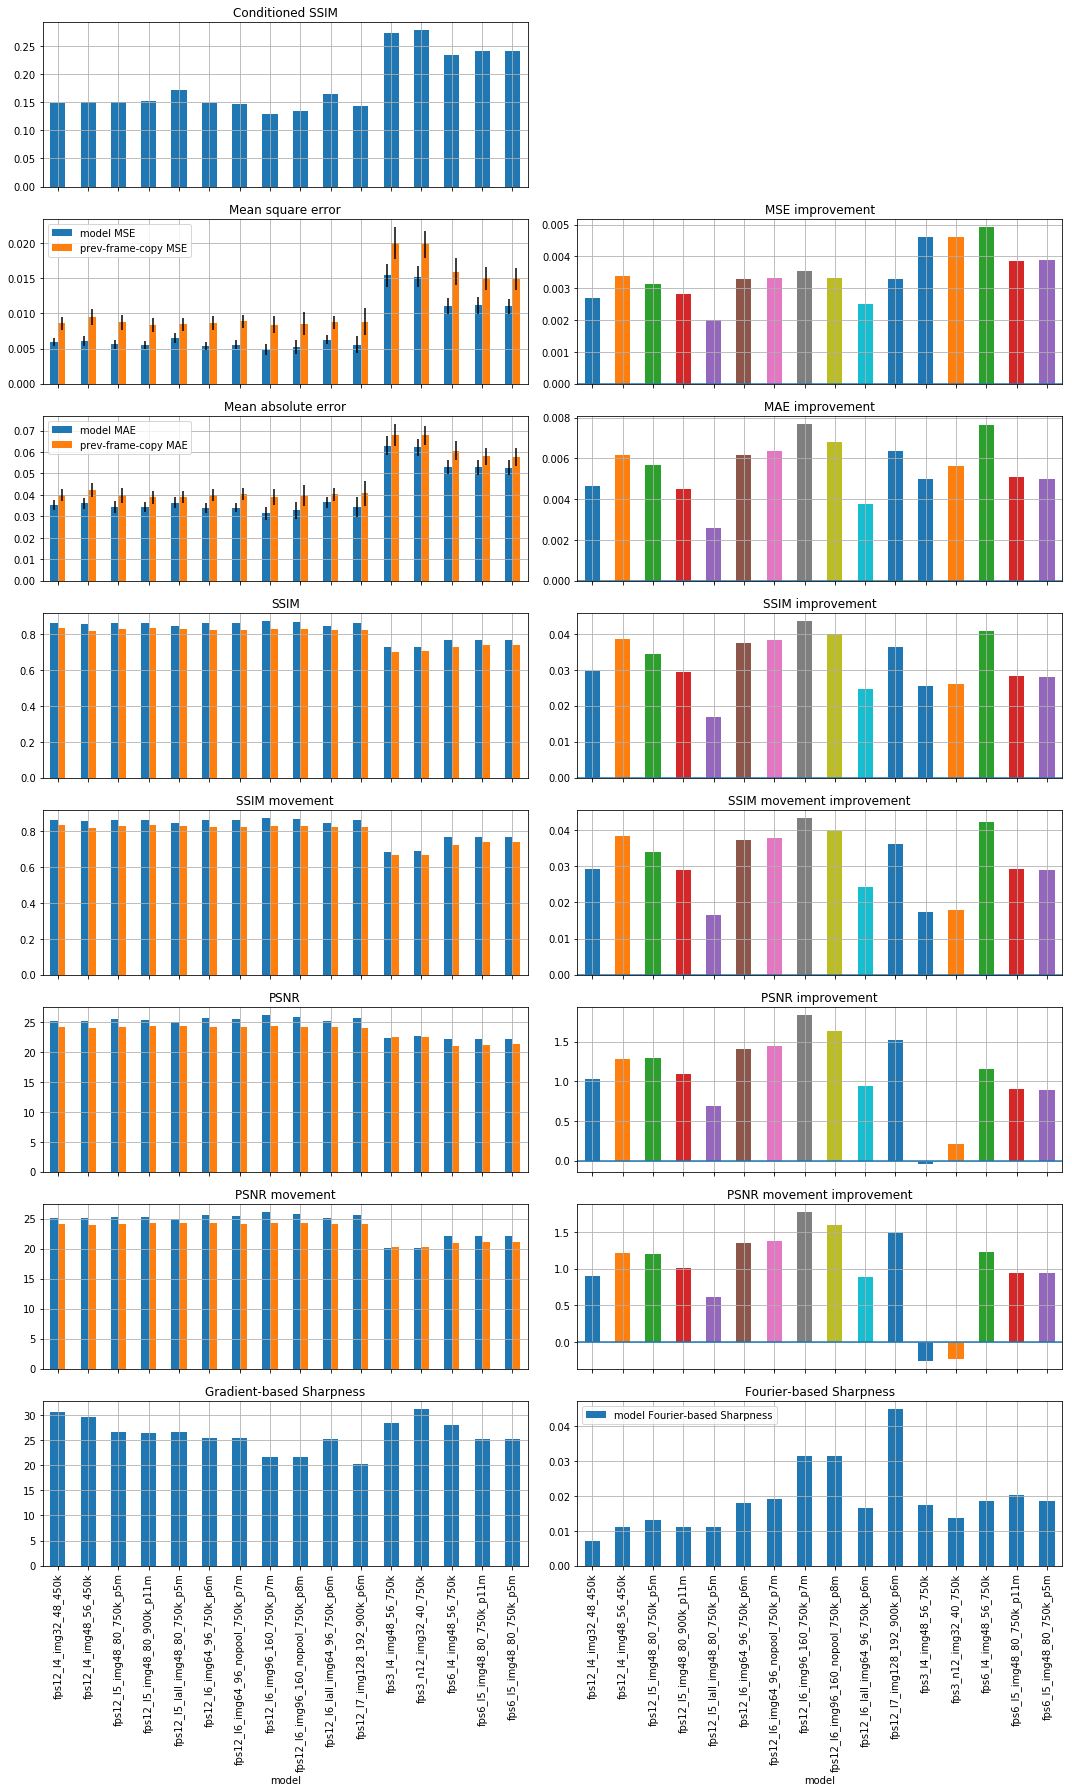

In [5]:
plot_results_df(results)

In [6]:
model_names = {
    "fps3_l4_img48_56_750k": "Model 0" ,
    "fps6_l4_img48_56_750k" : "Model 1" ,
    "fps12_l4_img48_56_450k": "Model 2" ,
    "fps12_l4_img32_48_450k": "Model 3",
"fps12_l5_img48_80_750k_p5m": "Model 4",
"fps12_l6_img64_96_750k_p6m": "Model 5",
"fps12_l7_img128_192_900k_p6m": "Model 6",
"fps12_l6_img96_160_750k_p7m": "Model 7",
"fps12_l5_lall_img48_80_750k_p5m": "Model 8",
"fps12_l6_lall_img64_96_750k_p6m": "Model 9"
}

results_final = results.reset_index().copy()
results_final.model = results_final.model.map(model_names)
results_final = results_final.dropna(subset=['model']).set_index(['model'])

In [7]:
# results.index

In [8]:
# results_final.index

In [9]:
results_final['Conditioned_SSIM_mean'] = 1 - results_final['Conditioned_SSIM_mean']
results_final = results_final.reset_index().dropna(subset=['model']).set_index(['model'])

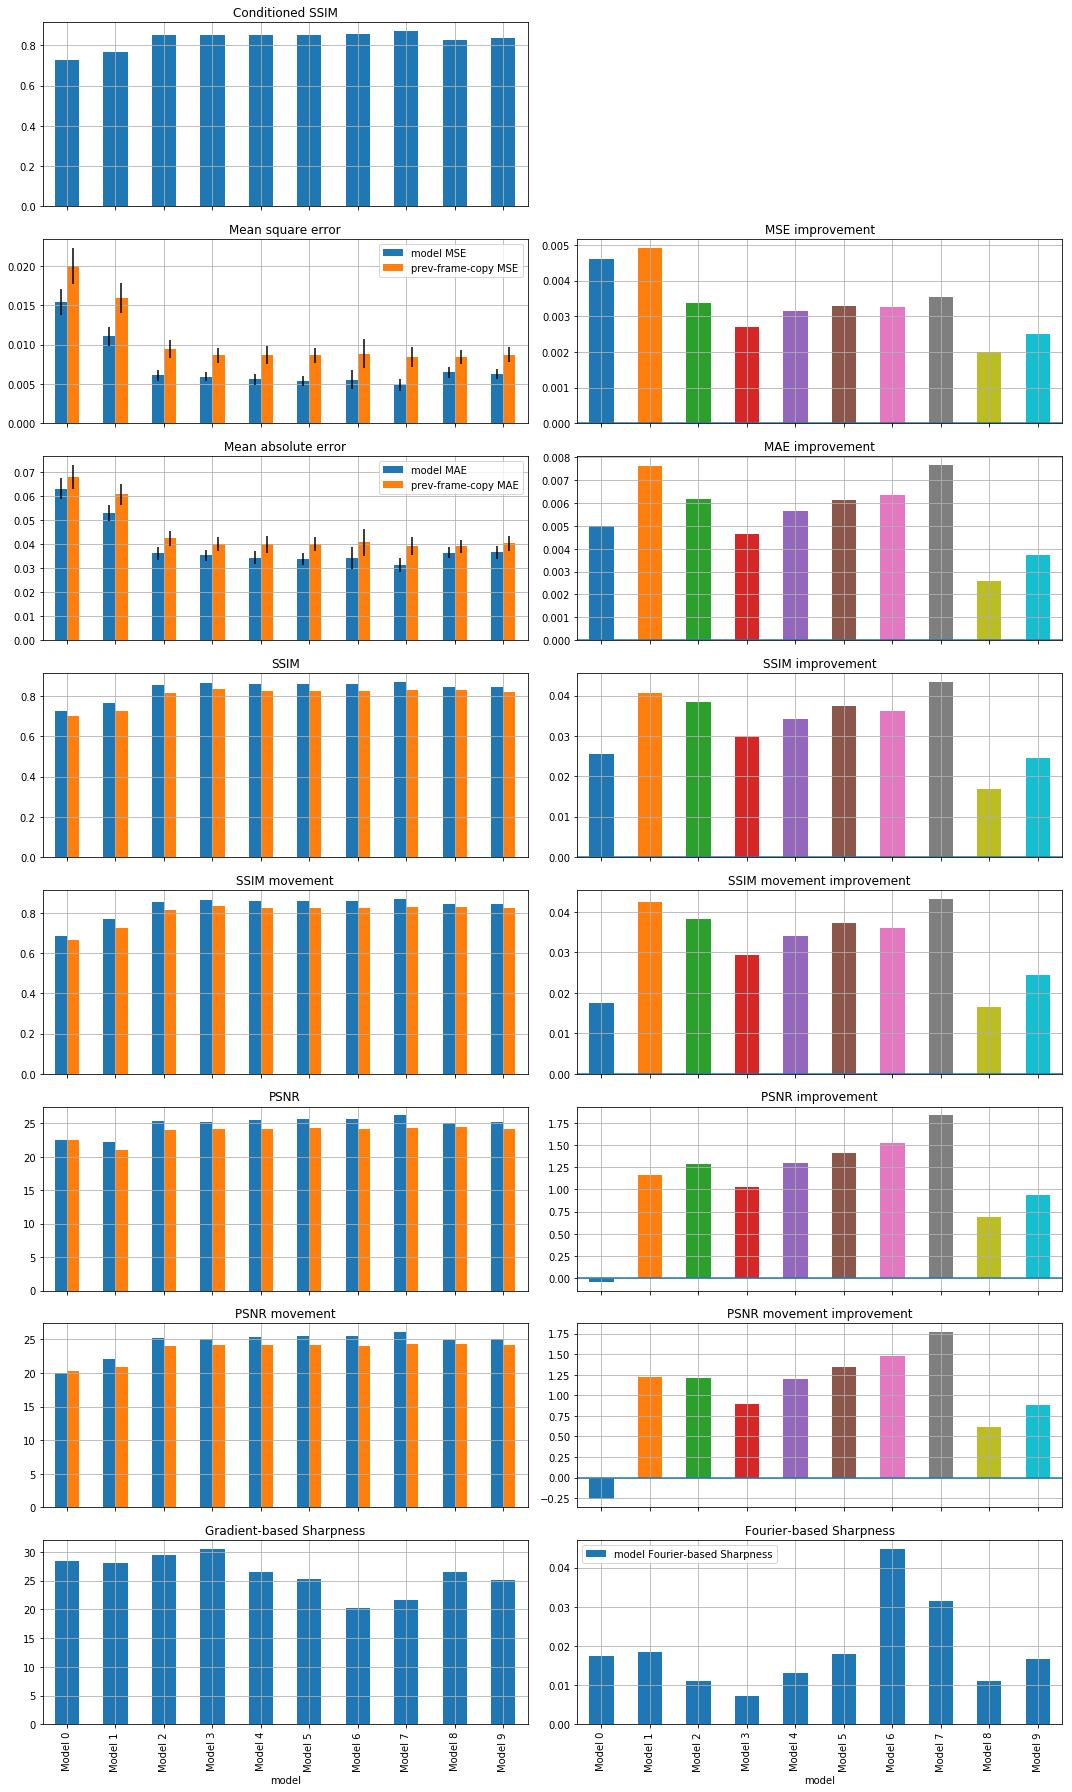

In [10]:
plot_results_df(results_final.sort_index())